# Hypertensive modeling, with downsampling

In [1]:

import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np 
import warnings
import sklearn

from scipy.stats import uniform, loguniform

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
 

from IPython.display import display
from IPython.display import HTML
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute._base import SimpleImputer as Imputer 
from sklearn.utils import resample

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
   
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from xgboost import XGBClassifier

warnings.filterwarnings("ignore")

## We will try out several models, maximizing the f1 score

In [2]:
score_obj = 'f1'

#### Import training data

In [3]:
!pip install pickle5
import pickle5 as pickle
with open("HT_train.pkl","rb") as fh:
    df_train = pickle.load(fh)

#df_train = pd.read_pickle("HT_train.pkl")  

df_train, df_valid = train_test_split( df_train,  
                                          train_size = .9, 
                                          test_size = .1)

### Downsample to balance the training set.

In [4]:


df_train_p = df_train[(df_train.HyperDiastolic == 1)]
df_train_n = df_train[(df_train.HyperDiastolic == 0)] 

samples = min(df_train_p.shape[0],df_train_n.shape[0])

df_train_p_dnsampled = resample(df_train_p, replace=False, n_samples=samples)
df_train_n_dnsampled = resample(df_train_n, replace=False, n_samples=samples) 

df_train = pd.concat([df_train_n_dnsampled,df_train_p_dnsampled])

### Split training and validation set

In [5]:
Z_train = df_train.drop(['HyperSystolic','HyperDiastolic','Hypertensive'], axis = 1)
w_train = df_train['Hypertensive']

Z_train, Z_valid_bal, w_train, w_valid_bal = train_test_split(
                                          Z_train, w_train,  
                                          train_size = .9, 
                                          test_size = .1)

Z_valid = df_valid.drop(['HyperSystolic','HyperDiastolic','Hypertensive'], axis = 1)
w_valid = df_valid['Hypertensive']


### Features for the model:

In [6]:

print('The features for our hypertension model are as follows:\n')
print(', '.join(Z_train.columns))
print('\nThe dimensions of the hypertension training set are ', Z_train.shape)
print('\nThe dimensions of the hypertension validation set are ', Z_valid.shape)

The features for our hypertension model are as follows:

Age, Education, Gender, HHIncome, Alcohol, HyperHist, CholHist, ChestPain, Shortness, DiabHist, Frozen, FastFood, ReadytoEat, MealsOut, Milk, KidneyStones, WeakKidneys, UrineLeak, FeltBad, HoursWorked, Dental, Pesticides, ModRec, WalkBike, VigRec, ModWork, VigWork, PregnantEver, PregnantNow, HoursSlept, Smoke100, SmokeNow, Pulse, Weight, ArmCirc, BMI, LegLen, ArmLen, Waist, FoodFastHours, SessionTime, MaxWeightRatio, DiabAgeYoung, DiabAgeOld, MexAm, Hisp, White, Black

The dimensions of the hypertension training set are  (9439, 48)

The dimensions of the hypertension validation set are  (2742, 48)


### Parameter search for several models



Decision Tree Classifier Train Set Report
              precision    recall  f1-score   support

         0.0       0.66      0.45      0.53      3594
         1.0       0.72      0.86      0.78      5845

    accuracy                           0.70      9439
   macro avg       0.69      0.65      0.66      9439
weighted avg       0.70      0.70      0.69      9439

Decision Tree Classifier Balanced Validation Set Report
              precision    recall  f1-score   support

         0.0       0.63      0.42      0.51       416
         1.0       0.69      0.84      0.76       633

    accuracy                           0.67      1049
   macro avg       0.66      0.63      0.63      1049
weighted avg       0.67      0.67      0.66      1049

Decision Tree Classifier Validation Set Report
              precision    recall  f1-score   support

         0.0       0.85      0.44      0.58      1677
         1.0       0.50      0.88      0.64      1065

    accuracy                       

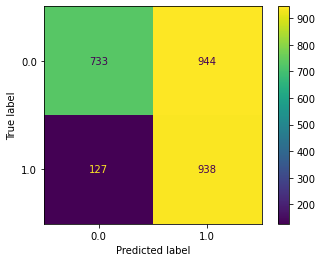

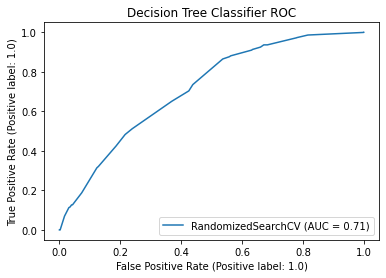

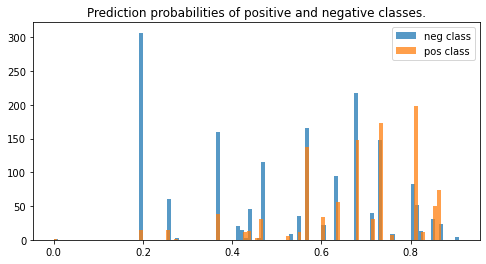







Random Forest Classifier Train Set Report
              precision    recall  f1-score   support

         0.0       0.77      0.40      0.53      3594
         1.0       0.72      0.93      0.81      5845

    accuracy                           0.73      9439
   macro avg       0.74      0.66      0.67      9439
weighted avg       0.74      0.73      0.70      9439

Random Forest Classifier Balanced Validation Set Report
              precision    recall  f1-score   support

         0.0       0.69      0.32      0.43       416
         1.0       0.67      0.91      0.77       633

    accuracy                           0.67      1049
   macro avg       0.68      0.61      0.60      1049
weighted avg       0.68      0.67      0.64      1049

Random Forest Classifier Validation Set Report
              precision    recall  f1-score   support

         0.0       0.90      0.35      0.51      1677
         1.0       0.48      0.94      0.63      1065

    accuracy                   

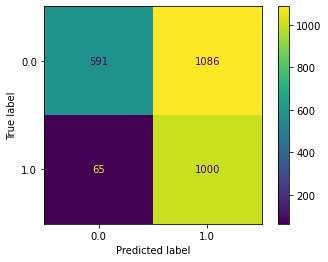

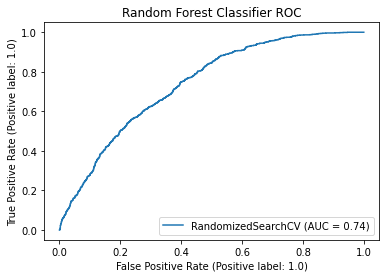

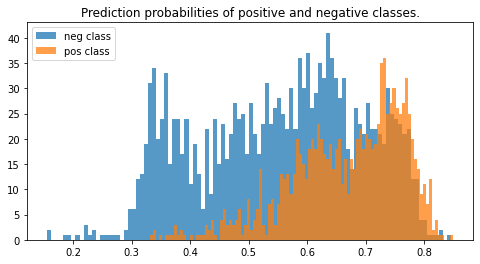







Gradient Boosting Classifier Train Set Report
              precision    recall  f1-score   support

         0.0       0.70      0.45      0.55      3594
         1.0       0.72      0.88      0.79      5845

    accuracy                           0.72      9439
   macro avg       0.71      0.66      0.67      9439
weighted avg       0.71      0.72      0.70      9439

Gradient Boosting Classifier Balanced Validation Set Report
              precision    recall  f1-score   support

         0.0       0.65      0.39      0.49       416
         1.0       0.68      0.86      0.76       633

    accuracy                           0.67      1049
   macro avg       0.66      0.63      0.62      1049
weighted avg       0.67      0.67      0.65      1049

Gradient Boosting Classifier Validation Set Report
              precision    recall  f1-score   support

         0.0       0.87      0.42      0.57      1677
         1.0       0.50      0.90      0.64      1065

    accuracy       

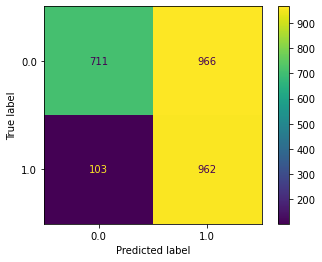

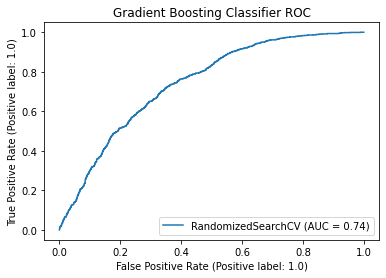

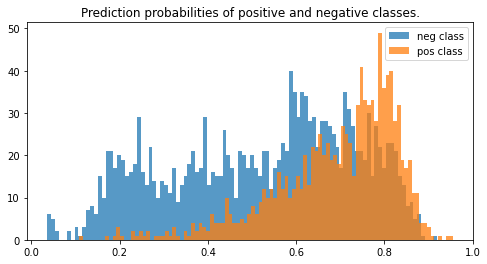







Logistic Regression Train Set Report
              precision    recall  f1-score   support

         0.0       0.65      0.45      0.53      3594
         1.0       0.72      0.85      0.78      5845

    accuracy                           0.70      9439
   macro avg       0.68      0.65      0.65      9439
weighted avg       0.69      0.70      0.68      9439

Logistic Regression Balanced Validation Set Report
              precision    recall  f1-score   support

         0.0       0.66      0.41      0.50       416
         1.0       0.69      0.86      0.76       633

    accuracy                           0.68      1049
   macro avg       0.67      0.63      0.63      1049
weighted avg       0.68      0.68      0.66      1049

Logistic Regression Validation Set Report
              precision    recall  f1-score   support

         0.0       0.85      0.44      0.58      1677
         1.0       0.50      0.88      0.64      1065

    accuracy                           0.61   

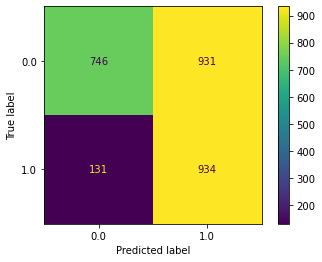

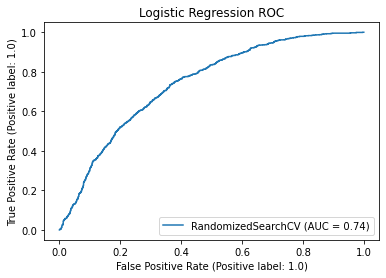

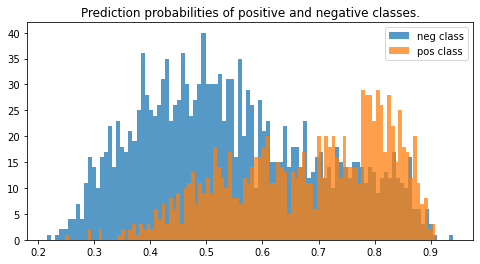







Support Vector (rbf kernel) Classifier Train Set Report
              precision    recall  f1-score   support

         0.0       0.67      0.42      0.51      3594
         1.0       0.71      0.87      0.78      5845

    accuracy                           0.70      9439
   macro avg       0.69      0.65      0.65      9439
weighted avg       0.69      0.70      0.68      9439

Support Vector (rbf kernel) Classifier Balanced Validation Set Report
              precision    recall  f1-score   support

         0.0       0.67      0.36      0.47       416
         1.0       0.68      0.88      0.77       633

    accuracy                           0.67      1049
   macro avg       0.67      0.62      0.62      1049
weighted avg       0.67      0.67      0.65      1049

Support Vector (rbf kernel) Classifier Validation Set Report
              precision    recall  f1-score   support

         0.0       0.86      0.41      0.55      1677
         1.0       0.49      0.89      0.63 

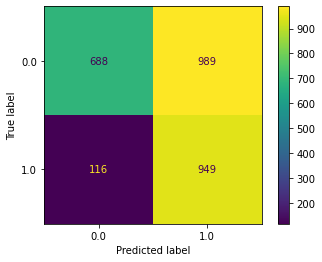

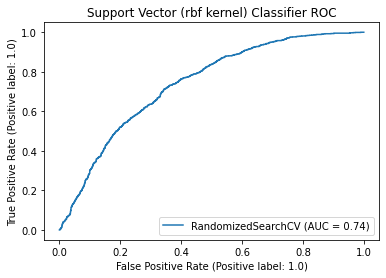







XGB Classifier Train Set Report
              precision    recall  f1-score   support

         0.0       0.69      0.42      0.52      3594
         1.0       0.71      0.88      0.79      5845

    accuracy                           0.71      9439
   macro avg       0.70      0.65      0.65      9439
weighted avg       0.70      0.71      0.69      9439

XGB Classifier Balanced Validation Set Report
              precision    recall  f1-score   support

         0.0       0.66      0.37      0.48       416
         1.0       0.68      0.87      0.76       633

    accuracy                           0.67      1049
   macro avg       0.67      0.62      0.62      1049
weighted avg       0.67      0.67      0.65      1049

XGB Classifier Validation Set Report
              precision    recall  f1-score   support

         0.0       0.89      0.42      0.57      1677
         1.0       0.50      0.91      0.65      1065

    accuracy                           0.61      2742
   macr

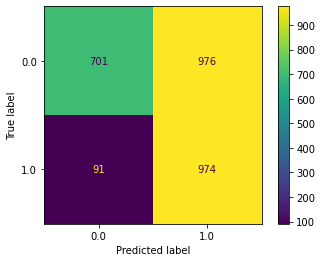

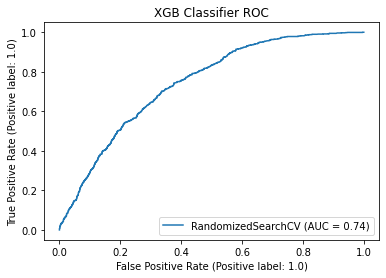

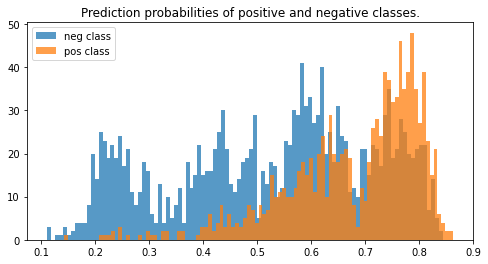

In [7]:

models = {
    'Decision Tree Classifier':{
        'algo': DecisionTreeClassifier(), 
        'n_search':20,
        'grid': {'decisiontreeclassifier__max_depth':list(range(1,30))}
    },
    'Random Forest Classifier':{
        'algo': RandomForestClassifier(), 
        'n_search':20,
        'grid': {'randomforestclassifier__max_depth':list(range(1,20)),
               'randomforestclassifier__n_estimators':list(range(50,250,25))}
    },
    'Gradient Boosting Classifier':{
        'algo': GradientBoostingClassifier(),  
        'n_search':20,
        'grid':  {'gradientboostingclassifier__max_depth': list(range(1,20)), 
               'gradientboostingclassifier__n_estimators': list(range(50,250,25)),
               'gradientboostingclassifier__loss': ['deviance','exponential']}
    },
    'Logistic Regression':{
        'algo': LogisticRegression(), 
        'n_search':20,
        'grid':{'logisticregression__C': loguniform(1e-2 , 1e2) }
    },
    'Support Vector (rbf kernel) Classifier':{
        'algo': SVC(kernel = 'rbf'), 
        'n_search':20,
        'grid': { 'svc__gamma': loguniform(1e-4, 1e0),
               'svc__C': loguniform(1, 1e3)} 
    },
    'XGB Classifier':{
        'algo': XGBClassifier(use_label_encoder=False,eval_metric = 'logloss'),  
        'n_search': 40,
        'grid': {'xgbclassifier__eta': loguniform(1e-2, 1e0), 
              'xgbclassifier__gamma': loguniform(1e-8 , 1e-2),
              'xgbclassifier__lambda': loguniform(1e-2 , 1e1),
              'xgbclassifier__alpha': loguniform(1e-8 , 1e-4),
              'xgbclassifier__max_depth': [3,4,5,6,7,8]} 
    }
}

for name, model in models.items():
    
    algorithm = model['algo']
    n_search = model['n_search']
    grid_params = model['grid'] 
       
    pipeline = make_pipeline( MinMaxScaler(),algorithm )
    
    model_grid = RandomizedSearchCV(pipeline,grid_params, 
                                    cv = 5, n_jobs = 1, 
                                    scoring = score_obj, n_iter=n_search)
    
    model_grid.fit(Z_train, w_train)
    model['trained'] = model_grid
    
    print('\n')
    
    HTML('<font size = 7>'+name+'</font>')
    
    w_train_pred = model_grid.predict(Z_train)
    print(name, 'Train Set Report')
    print(classification_report(w_train, w_train_pred))
    
    w_valid_bal_pred = model_grid.predict(Z_valid_bal)
    print(name, 'Balanced Validation Set Report')
    print(classification_report(w_valid_bal, w_valid_bal_pred))
    
    w_valid_pred = model_grid.predict(Z_valid)
    print(name, 'Validation Set Report')
    print(classification_report(w_valid, w_valid_pred))
  

    
    plot_confusion_matrix(model_grid, Z_valid, w_valid)
    plt.show()
    
    metrics.plot_roc_curve(model_grid,Z_valid,w_valid)
    title = name + ' ROC'
    plt.title(title)
    plt.show()
    
 
    try: 
        w_pred = model_grid.predict_proba(Z_valid)[:, 1]
        plt.figure(figsize=(8,4))
        plt.hist(w_pred[np.where(w_valid == 0)], bins=100, alpha=0.75, label='neg class')
        plt.hist(w_pred[np.where(w_valid == 1)], bins=100, alpha=0.75, label='pos class')
        plt.legend()
        plt.title('Prediction probabilities of positive and negative classes.')
        plt.show()
    except:
        pass
         
    model['f1_score'] = f1_score(w_valid,w_valid_pred)
    model['Best Parameters'] = model_grid.best_params_
    
    
    print('\n'*3)
    
    

### Stacked model predictor

In [8]:
f1_dict = {name:models[name]['f1_score'] for name in models}
from collections import Counter
best_models = [x[0] for x in Counter(f1_dict).most_common(3)]
best_models = {x:models[x] for x in best_models}

for name,model in best_models.items():
    print(f'Model: {name}')
    print(f"f1 score: {model['f1_score']}")
    print('Parameters:')
    for parameter, value in model['Best Parameters'].items():
        print(f"{parameter.split('__')[1]}: {value}")
    print('\n'*2)

Model: XGB Classifier
f1 score: 0.6461028192371475
Parameters:
alpha: 9.030252665924109e-06
eta: 0.03903802254207912
gamma: 4.5930446231061723e-07
lambda: 0.014406551200615273
max_depth: 3



Model: Gradient Boosting Classifier
f1 score: 0.6428332776478449
Parameters:
n_estimators: 50
max_depth: 4
loss: exponential



Model: Logistic Regression
f1 score: 0.6375426621160409
Parameters:
C: 0.02672926534421528





### Stacking best models for the best predictor

Stacking Classifier Train Report
              precision    recall  f1-score   support

         0.0       0.67      0.45      0.54      3594
         1.0       0.72      0.87      0.79      5845

    accuracy                           0.71      9439
   macro avg       0.70      0.66      0.66      9439
weighted avg       0.70      0.71      0.69      9439

Stacking Classifier Validation Report
              precision    recall  f1-score   support

         0.0       0.87      0.44      0.59      1677
         1.0       0.50      0.90      0.65      1065

    accuracy                           0.62      2742
   macro avg       0.69      0.67      0.62      2742
weighted avg       0.73      0.62      0.61      2742

The f1 score on the validation set  is 0.6459


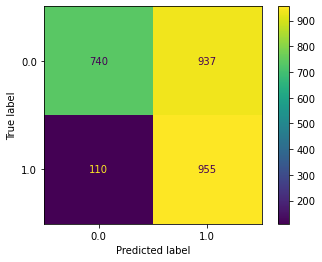

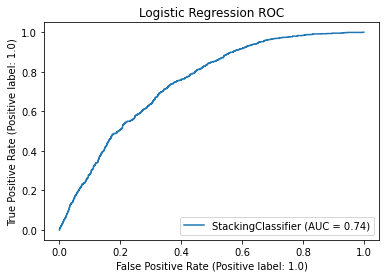

In [9]:
estimators = [
    ('GBC', GradientBoostingClassifier(max_depth = 2, n_estimators = 100,loss='exponential')),
    ('LogReg',make_pipeline( MinMaxScaler(),LogisticRegression(C = .011))),
    ('XGB',XGBClassifier(use_label_encoder=False,eval_metric = 'logloss',
                              alpha = 3.8e-7, eta = 0.044, gamma = 1.9e-3, 
                              reg_lambda = 0.021, max_depth = 3 ))
]
stack = StackingClassifier(estimators=estimators,
                          final_estimator = LogisticRegression())
stack.fit(Z_train, w_train)

w_train_pred = stack.predict(Z_train)
print('Stacking Classifier Train Report')
print(classification_report(w_train, w_train_pred))
w_valid_pred = stack.predict(Z_valid)
print('Stacking Classifier Validation Report')
print(classification_report(w_valid, w_valid_pred))
        
print(f'The f1 score on the validation set  is { f1_score(w_valid,w_valid_pred):.4f}')    
        
plot_confusion_matrix(stack, Z_valid, w_valid)
plt.show()
    
metrics.plot_roc_curve(stack,Z_valid,w_valid)
title = name + ' ROC'
plt.title(title)
plt.show()

The stacked model slightly outperforms the best model (Gradient Boosting Classifier), we will save it for future use.

In [10]:
from joblib import dump

dump(stack,'hypertensiveClf.joblib')

['hypertensiveClf.joblib']